### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [75]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [76]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
data.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [77]:
#2
data.info()

#conclusion
#There is missing values in race and admission columns, showns by the non-null total is not the same as data entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [78]:
#3a
admission = data['admission'].value_counts(dropna=False)

print(admission)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [79]:
#3b
race = data['race'].value_counts(dropna=False)

print(race)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [80]:
#4
data['admission'] = data['admission'].fillna('deny')
data['race'] = data['race'].fillna('other')

5. recheck missing value

In [81]:
#5
data.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [82]:
# 6
data = data.drop('application_id',axis = 1)

7. show describe column and conclude what the insight is from that column

In [83]:
#7
data.describe()

#conclusion
#The average of the GPA is 3.25 and the lowest GPA is 2.65. The average work experience is 5 year with the lowest work experience is 1 year.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

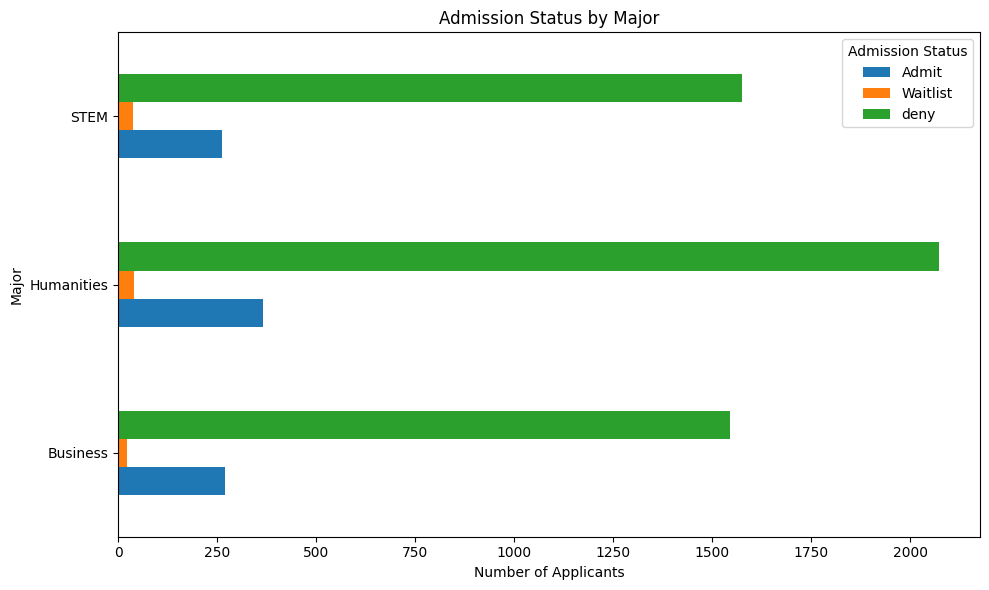

In [84]:
#8

a=data.groupby(['major','admission'])['admission'].count().unstack()

a.plot(kind='barh', figsize=(10, 6))

plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='upper right')
plt.tight_layout()
plt.show()

# Conclusion
# Most of the applicants is denied in every major, and there is only few amounts of applicants that is in the waitlist.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

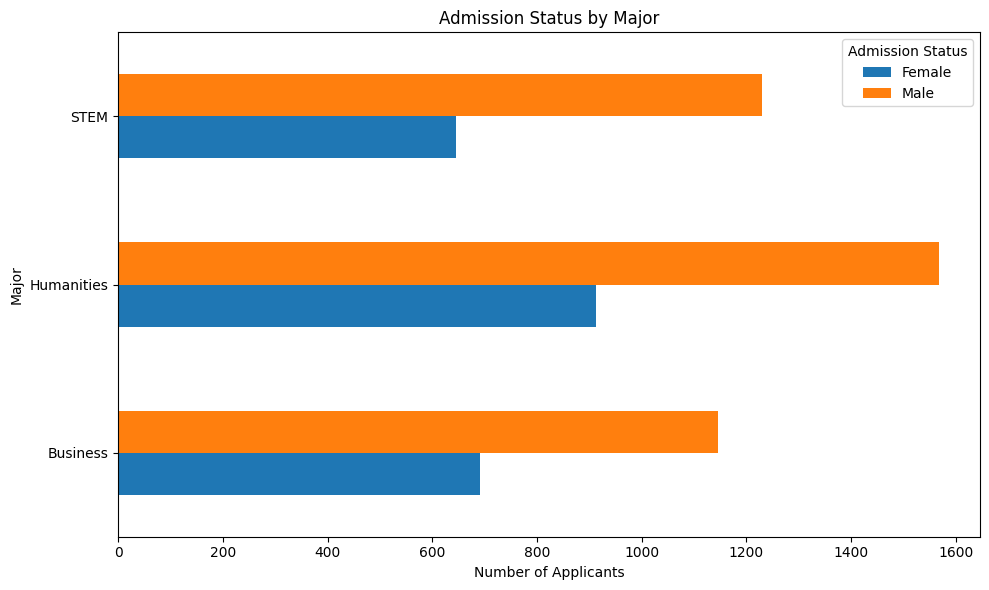

In [85]:
#9
a=data.groupby(['major','gender'])['gender'].count().unstack()

a.plot(kind='barh', figsize=(10, 6))

plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='upper right')
plt.tight_layout()
plt.show()

# Conclusion
# Most of the applicants gender is male, and the fewest male applicants is in the business major, meanwhile the fewest female applicants is in STEM major.

10. create your own insightful visualization and explain it in at least 2 sentences

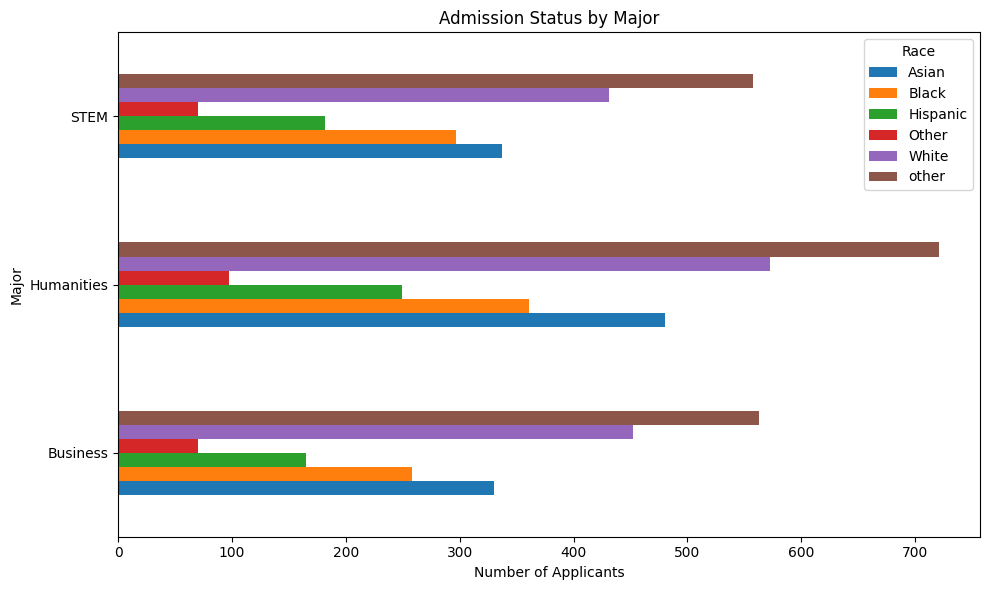

In [86]:
#10
a = data.groupby(['major','race'])['race'].count().unstack()

a.plot(kind='barh', figsize=(10, 6))

plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Race', loc='upper right')
plt.tight_layout()
plt.show()

# Conclusion
# Most of the applicants in each major are White Race people, followed by Asian race, and the least is from international student. The most favorite major for White people is humanities, and the least favorite is STEM, meanwhile Black people also mostly applied in humanities but the least favorite is Business Major.

11. create your own insightful visualization and explain it in at least 2 sentences

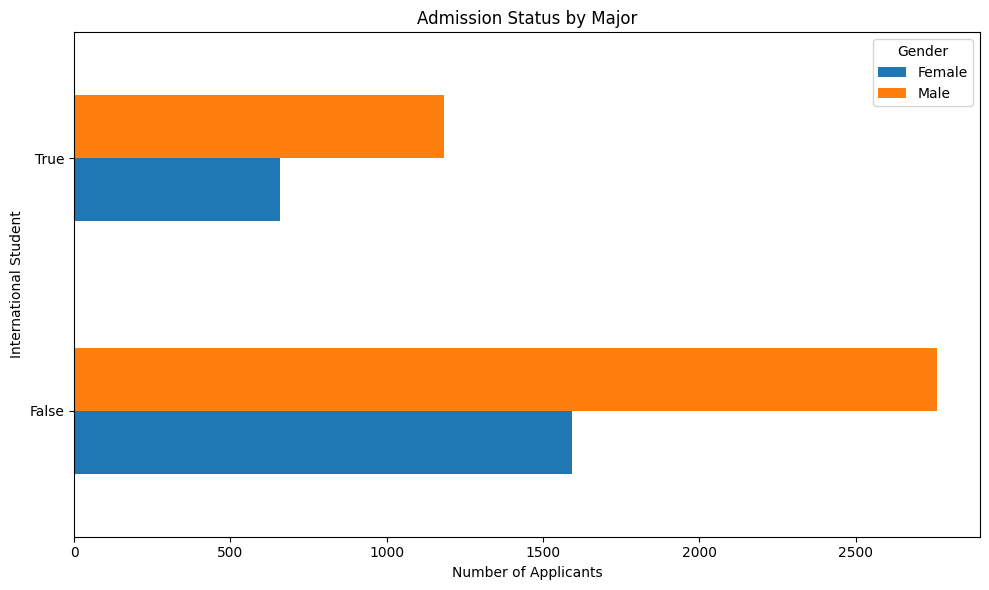

In [87]:
#11
a = data.groupby(['international','gender'])['gender'].count().unstack()

a.plot(kind='barh', figsize=(10, 6))

plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('International Student')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

# Conclusion
# Both international student or not, most of them are male. The total of international student is less than the local student both male or female.

12. encode categorical columns and display the results

In [88]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

X = data.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

data[columns] = X[columns]

data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [89]:
#12b
#encode y
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

le = LabelEncoder()
data['admission'] = le.fit_transform(data['admission'])

label_encoders['admission'] = le

data.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

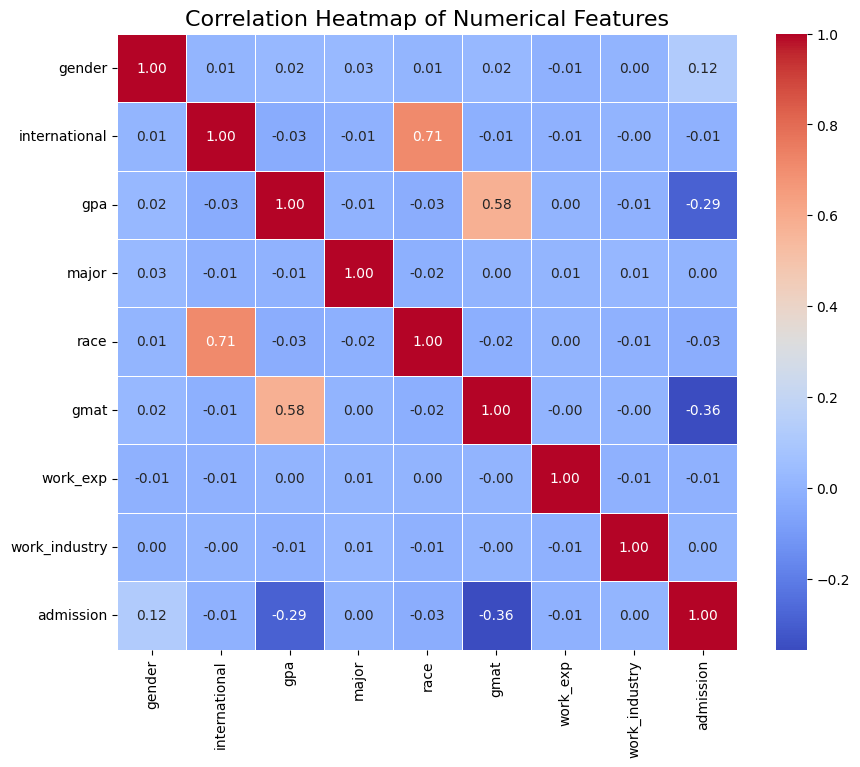

In [93]:
#13
import seaborn as sns
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Display the heatmap
plt.show()

#Conclusion
# The correlation heatmap reveals a strong positive correlation (0.71) between international status and race, indicating that many international students belong to specific racial groups, while also showing a negative correlation (-0.36) between race and admission status, suggesting disparities in acceptance rates based on race.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

average_gpa = data['gpa'].mean()

# Prepare Lisa's data
data_Lisa = {
    'gender': 0,  # Assuming Lisa is female
    'international': 0,  # Local student
    'gpa': average_gpa,  # Average GPA
    'major': 0,  # Entrepreneurship
    'race': 0,  # Asian
    'gmat': 580.0,
    'work_exp': 2,  # 2018 to 2020
    'work_industry': 3
}

# Prepare features and target variable
X = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = data['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prepare Lisa's data for prediction
lisa = pd.DataFrame([data_Lisa])

# Predict acceptance for Lisa
prediction = model.predict(lisa)

# Output prediction
result = "Accepted" if prediction[0] == 1 else "Rejected"
print(f"Prediction for Lisa: {result}")


Accuracy: 0.8305084745762712
Prediction for Lisa: Rejected
